In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LINA
from sklearn.svm import SVR

In [50]:
X = np.loadtxt('Viscosity.txt')
n = X.shape[0]
d = X.shape[1]
d -= 1
print(n,d)

499 190


In [51]:
n_train = int(n*0.8)
n_test  = n - n_train
#X = np.random.permutation(X)

X_train = np.zeros((n_train,d))
X_test  = np.zeros((n_test,d))
Y_train = np.zeros((n_train))
Y_test = np.zeros((n_test))

X_train[:] = X[:n_train,:-1]
Y_train[:] = X[:n_train,-1]

X_test[:] = X[n_train:,:-1]
Y_test[:] = X[n_train:,-1]

print(X_train.shape)
print(X_test.shape)

f = open('Deslist','r')
Deslist = []
for line in f:
    Deslist.append(line.strip('\n\t'))
print(Deslist)

(399, 190)
(100, 190)
['steiger', 'Marsili Partial Charges', 'BalabanJ', 'BertzCT', 'Ipc', 'HallKierAlpha', 'Kappa1', 'Kappa2', 'Kappa3', 'Chi0', 'Chi1', 'Chi0n', 'Chi1n', 'Chi2n', 'Chi3n', 'Chi4n', 'Chi0v', 'Chi1v', 'Chi2v', 'Chi3v', 'Chi4v', 'MolLogP', 'MolMR', 'MolWt', 'HeavyAtomCount', 'HeavyAtomMolWt', 'NHOHCount', 'NOCount', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds', 'NumValenceElectrons', 'RingCount', 'TPSA', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'SMR_VSA1', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SMR_VSA10', 'SlogP_VSA1', 'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA4', 'SlogP_VSA5', 'SlogP_VSA6', 'SlogP_VSA7', 'SlogP_VSA8', 'SlogP_VSA9', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', 'EState_VSA1', 'EState_VSA2', 'EState_VSA3', 'EState_VSA4', '

In [52]:
clf = SVR(C=1.0, epsilon=0.01,max_iter=10000)
clf.fit(X_train,Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma='auto',
  kernel='rbf', max_iter=10000, shrinking=True, tol=0.001, verbose=False)

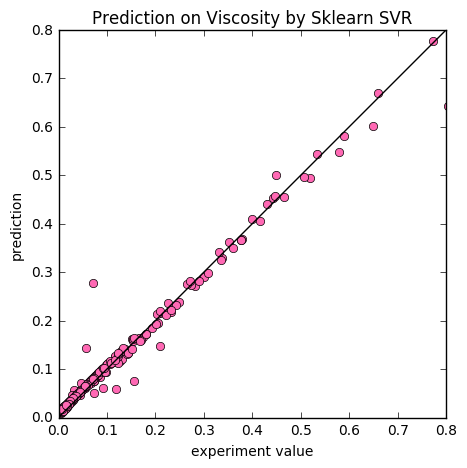

In [53]:
plt.figure(figsize=(5,5))
plt.plot(Y_train,clf.predict(X_train),"o",color ='hotpink')
plt.plot(np.arange(0,0.8,0.0001),np.arange(0,0.8,0.0001),color = 'black')
plt.axis([0,0.8,0,0.8])
plt.xlabel('experiment value')
plt.ylabel('prediction')
plt.title('Prediction on Viscosity by Sklearn SVR')
plt.show()

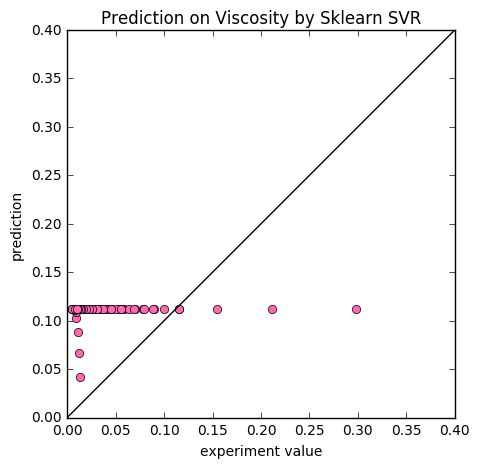

In [54]:
plt.figure(figsize=(5,5))
plt.plot(Y_test,clf.predict(X_test),"o",color ='hotpink')
plt.plot(np.arange(0,0.4,0.0001),np.arange(0,0.4,0.0001),color = 'black')
plt.axis([0,0.4,0,0.4])
plt.xlabel('experiment value')
plt.ylabel('prediction')
plt.title('Prediction on Viscosity by Sklearn SVR')
plt.show()